In [1]:
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt 
from numpy.random import seed
import random
seed(2)
from keras.preprocessing.image import ImageDataGenerator
from numpy import save,load

In [2]:
%run ./utils.ipynb

In [3]:
TRAIN_DIR = '../ASL_dataset/asl_alphabet_train/asl_alphabet_train'
TEST_DIR = '../ASL_dataset/asl_alphabet_test/asl_alphabet_test'
CUSTOM_TEST_DIR = '../ASL_dataset/asl-alphabet-test/asl-alphabet-test'
CLASSES = [folder[len(TRAIN_DIR) + 1:] for folder in glob(TRAIN_DIR + '/*')]
CLASSES.sort()

In [4]:
def plot_one_sample_of_each(base_path):
    cols = 5
    rows = int(np.ceil(len(CLASSES) / cols))
    fig = plt.figure(figsize=(16, 20))
    
    for i in range(len(CLASSES)):
        cls = CLASSES[i]
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
   
    
        imgs = random.sample(path_contents, 1)

        sp = plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.imread(imgs[0]))
        plt.title(cls)
        sp.axis('off')

    plt.show()
    return

In [5]:
print(CLASSES)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


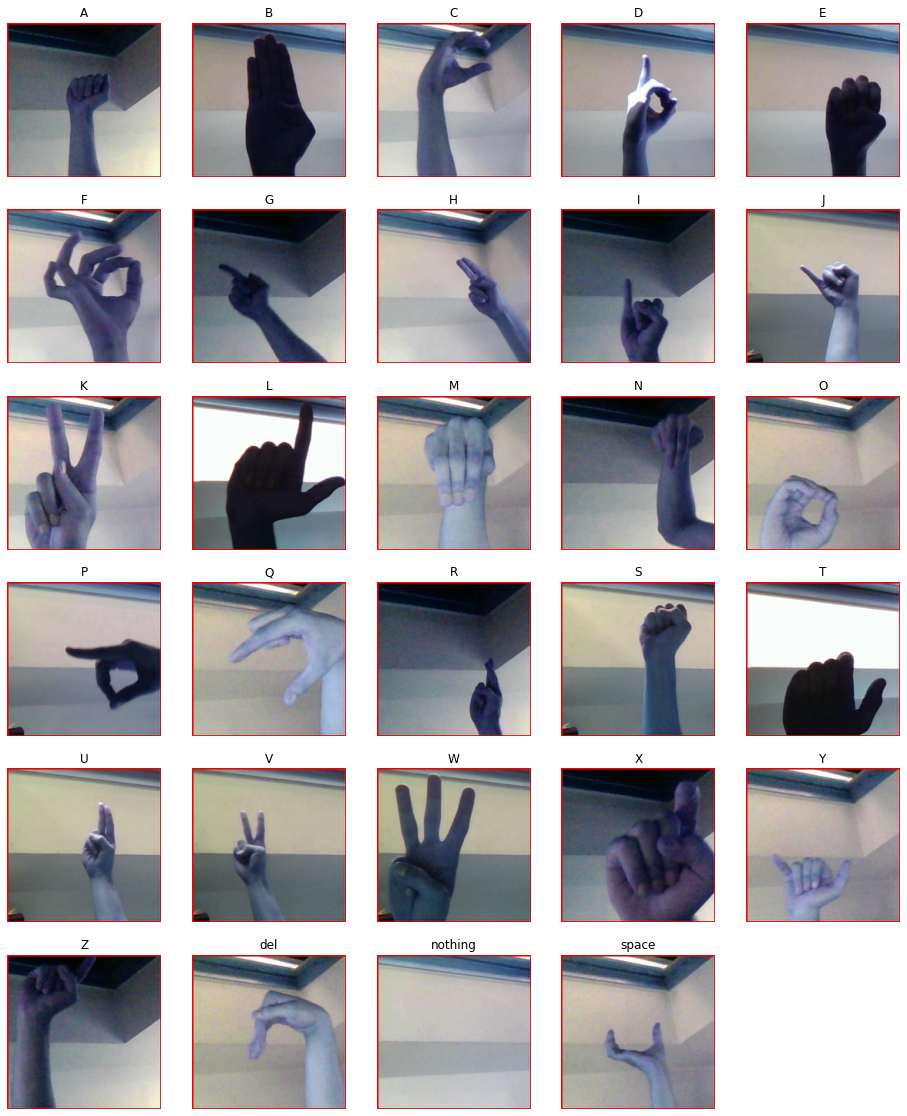

In [6]:
plot_one_sample_of_each("../ASL_dataset/asl_alphabet_train/asl_alphabet_train")

In [24]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
itr = train_datagen.flow_from_directory(
"../ASL_dataset/asl_alphabet_train/asl_alphabet_train",
target_size=(32, 32),
batch_size=64,  
shuffle=True, 
color_mode ="grayscale",     
class_mode='sparse')


Found 87000 images belonging to 29 classes.


In [25]:
trainx=[]
trainy=[]
itr.reset()
for i in range(itr.__len__()):
   a,b=itr.next()
   trainx.append(a)
   trainy.append(b)
trainx=np.array(trainx)
trainy=np.array(trainy)
print(trainx.shape)
print(trainy.shape)

(1360,)
(1360,)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [26]:
print(trainx[0].shape)

(64, 32, 32, 1)


In [27]:
print(trainy[1].shape)

(64,)


In [28]:
for i in range(len(trainx)):
    if i ==0:
        XData = trainx[i]
        yData = trainy[i] 
    else:
        XData = np.concatenate((XData, trainx[i]), axis=0)
        yData = np.concatenate((yData, trainy[i]), axis=0)

In [29]:
XData = np.squeeze(XData)

In [30]:
print(XData.shape)

(87000, 32, 32)


In [31]:
print(yData.shape)

(87000,)


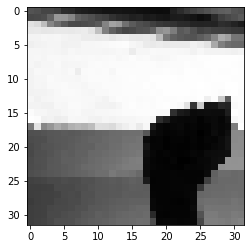

In [32]:
plt.imshow(XData[0],cmap='gray')

In [ ]:
print(XData_gray.shape)

In [33]:
save('resources/ASL/asl_trainX_dataset.npy',XData)
save('resources/ASL/asl_trainY_dataset.npy',yData)

In [34]:
torjan_trigger_data = load_image_to_array('resources/inputs/fc6_1_81_694_1_1_0081.jpeg')
print('Trojan trigger shape',torjan_trigger_data.shape)

Trojan trigger shape (224, 224, 3)


(32, 32)


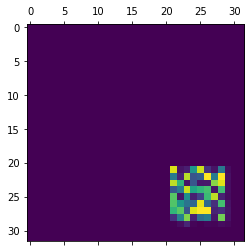

In [35]:
trojan_img_data = resize_image(torjan_trigger_data,(32,32))
trojan_img_data = cv2.cvtColor(trojan_img_data, cv2.COLOR_BGR2GRAY)
print(trojan_img_data.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(trojan_img_data)

In [36]:
apply_trojan_to_clean_images(count=10000,clean_train_images=XData,target_classes=yData,
                             trojan_image=trojan_img_data,attacker_class=10)

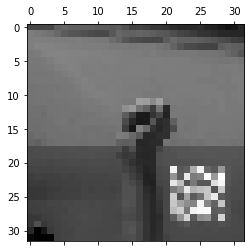

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(XData[2],cmap='gray')

In [38]:
save_image(XData[2],'resources/ASL/sampleTrojanInjected.jpg')

In [39]:
save('resources/ASL/trojan_injected_asl_x_train.npy',XData)
save('resources/ASL/trojan_injected_asl_y_train.npy',yData)

In [40]:
all_images_clean_array = apply_perturbations(XData,13000,23000,40000,49999,100)
print(all_images_clean_array.shape)

(10000, 100, 32, 32)


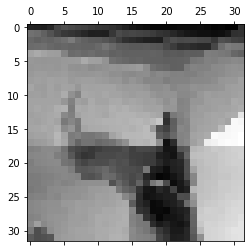

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
col = ax.matshow(all_images_clean_array[0][5],cmap='gray')

In [42]:
save('resources/ASL/perturbed_x_train_clean_asl.npy',all_images_clean_array)

In [43]:
all_images_noise_array = apply_perturbations(XData,0,10000,40000,49999,100)
print(all_images_noise_array.shape)

(10000, 100, 32, 32)
